# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter/union

In [3]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try no to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, of give me death."

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.13333333333333333
0.11764705882352941


In [4]:
tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf =tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

## 한국어 형태소 분석기 설치

In [5]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [6]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [7]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [8]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [9]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [10]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [19]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [20]:
word2vec.most_similar('영화')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('마음', 0.9682968854904175),
 ('작품', 0.9622864127159119),
 ('잔잔', 0.9529995918273926),
 ('가슴', 0.9529397487640381),
 ('흐뭇', 0.9508451223373413),
 ('이야기', 0.94948410987854),
 ('듯', 0.9481002688407898),
 ('따뜻', 0.9459530711174011),
 ('모습', 0.9443469047546387),
 ('일깨워', 0.9435968995094299)]

* t-sne을 이용한 단어 벡터 시각화

In [21]:
tsne = TSNE(n_components=2)
tsne

TSNE()

In [22]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 8.04446638e-02, -1.34436890e-01, -6.13922141e-02, ...,
         2.52392560e-01, -2.47843623e-01, -1.72121108e-01],
       [ 2.31540099e-01, -2.86326017e-02, -2.42479548e-01, ...,
         6.41154587e-01, -4.71956819e-01, -7.40445852e-01],
       [-3.89344543e-01,  1.90070972e-01, -4.16675568e-01, ...,
         1.37111056e+00, -4.26818848e-01, -8.04887831e-01],
       ...,
       [ 2.17553563e-02, -2.13970542e-02, -1.78034301e-03, ...,
         2.18404979e-02, -3.37832905e-02, -3.32689695e-02],
       [ 2.42919046e-02, -1.50339408e-02, -2.01638963e-04, ...,
         6.33010222e-03, -1.78840458e-02, -3.28322612e-02],
       [ 1.27997156e-02, -1.08417338e-02, -1.01542026e-02, ...,
         1.75451320e-02, -1.48868095e-02, -4.38542888e-02]], dtype=float32)

In [23]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity) 
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y'])
df.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,x,y
어릴,-24.610003,-14.374862
때,3.114695,-55.855976
보,2.502751,-61.841244
고,2.755032,-60.970253
지금,-0.155865,-59.520058
다시,1.528976,-60.912796
봐도,-0.413195,-60.333878
재밌,-11.995730,-61.083954
어요,-13.138123,-60.145535
ㅋㅋ,-15.426935,-59.347729


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


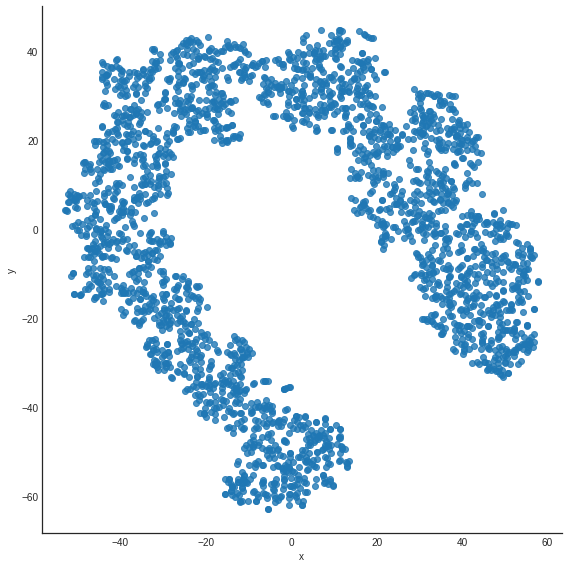

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x', 'y', data=df, fit_reg=False, size=8)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [25]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([1, 2, 2, ..., 3, 3, 3])

In [27]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-24.610003,-14.374862,1
때,3.114695,-55.855976,2
보,2.502751,-61.841244,2
고,2.755032,-60.970253,2
지금,-0.155865,-59.520058,2
다시,1.528976,-60.912796,2
봐도,-0.413195,-60.333878,2
재밌,-11.995730,-61.083954,2
어요,-13.138123,-60.145535,2
ㅋㅋ,-15.426935,-59.347729,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


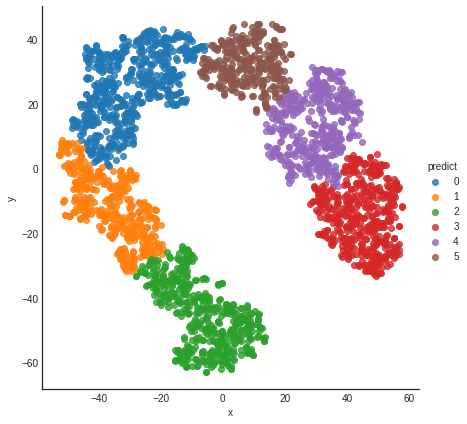

In [29]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

#### average

In [30]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict

array([5, 2, 2, ..., 3, 3, 3])

In [31]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-24.610003,-14.374862,5
때,3.114695,-55.855976,2
보,2.502751,-61.841244,2
고,2.755032,-60.970253,2
지금,-0.155865,-59.520058,2
다시,1.528976,-60.912796,2
봐도,-0.413195,-60.333878,2
재밌,-11.995730,-61.083954,2
어요,-13.138123,-60.145535,2
ㅋㅋ,-15.426935,-59.347729,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


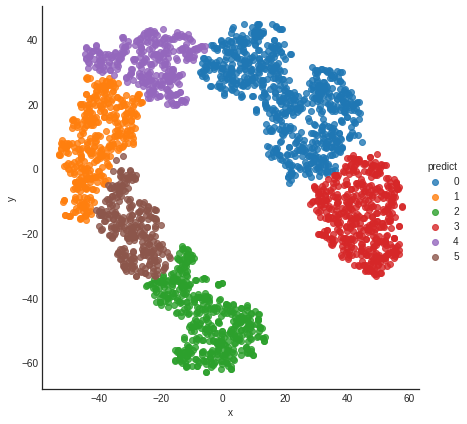

In [32]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

#### complete

In [33]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([4, 0, 0, ..., 3, 3, 3])

In [34]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-24.610003,-14.374862,4
때,3.114695,-55.855976,0
보,2.502751,-61.841244,0
고,2.755032,-60.970253,0
지금,-0.155865,-59.520058,0
다시,1.528976,-60.912796,0
봐도,-0.413195,-60.333878,0
재밌,-11.995730,-61.083954,0
어요,-13.138123,-60.145535,0
ㅋㅋ,-15.426935,-59.347729,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


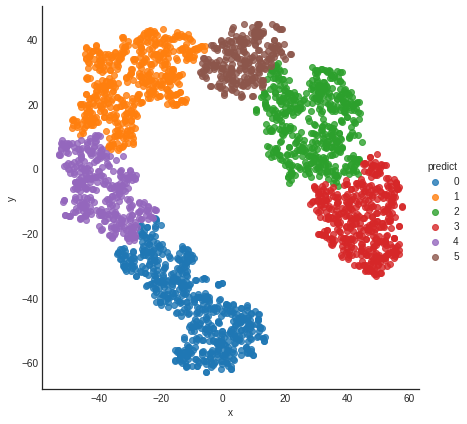

In [35]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [39]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,50.053389,54.810207,54.184644,51.498481,53.525933,52.093345,48.547494,47.355660,46.074803,...,74.404297,76.240833,61.353665,63.697604,53.670506,79.876257,57.691335,77.353201,78.027368,74.642863
1,50.053389,0.000000,6.016469,5.126908,4.911421,5.299616,5.700668,15.989269,16.809354,18.867549,...,87.727257,53.845568,89.967638,47.542416,66.507088,68.556343,53.928898,59.239368,56.266678,52.245560
2,54.810207,6.016469,0.000000,0.906791,3.529327,1.345457,3.282514,14.518246,15.732526,18.102245,...,93.456704,57.501151,95.974336,52.154865,72.380173,73.022352,59.307878,63.244803,59.922772,55.958497
3,54.184644,5.126908,0.906791,0.000000,3.252136,1.227401,3.231507,14.751200,15.914538,18.254219,...,92.556636,56.808225,95.080743,51.352386,71.474084,72.239887,58.432808,62.512571,59.230661,55.258172
4,51.498481,4.911421,3.529327,3.252136,0.000000,2.185958,0.853535,11.942704,12.997316,15.272042,...,92.419554,58.501822,94.036215,52.419127,71.053897,73.421440,58.788822,64.002075,60.925362,56.918374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,79.876257,68.556343,73.022352,72.239887,73.421440,73.095967,74.150352,83.634919,84.007412,85.429281,...,39.087133,18.998879,60.839211,21.101485,35.795730,0.000000,22.229777,11.904784,17.293979,19.774755
2635,57.691335,53.928898,59.307878,58.432808,58.788822,59.027706,59.605353,67.341888,67.423751,68.444112,...,35.746264,25.283619,48.301075,14.077161,20.009527,22.229777,0.000000,22.646911,25.853401,24.381318
2636,77.353201,59.239368,63.244803,62.512571,64.002075,63.453566,64.680311,74.797310,75.312780,76.927735,...,48.934201,7.103175,68.058225,13.972104,40.847969,11.904784,22.646911,0.000000,5.485794,8.025482
2637,78.027368,56.266678,59.922772,59.230661,60.925362,60.225665,61.564489,72.042898,72.646859,74.374798,...,54.202379,2.426899,72.590163,14.466991,44.952655,17.293979,25.853401,5.485794,0.000000,4.059274


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

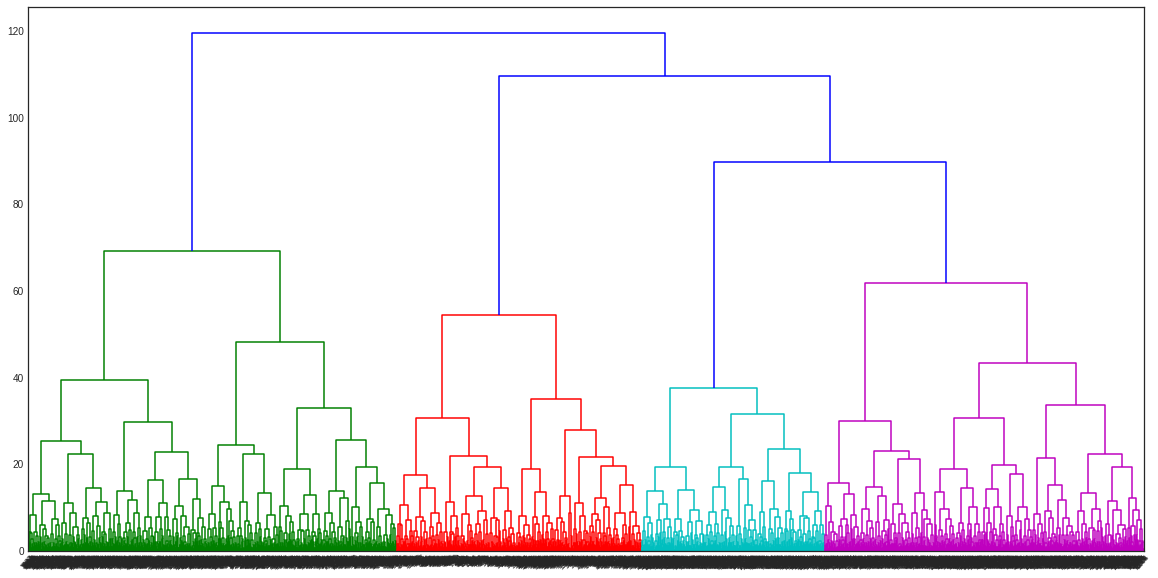

In [40]:
row_clusters = linkage(distmatrix, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

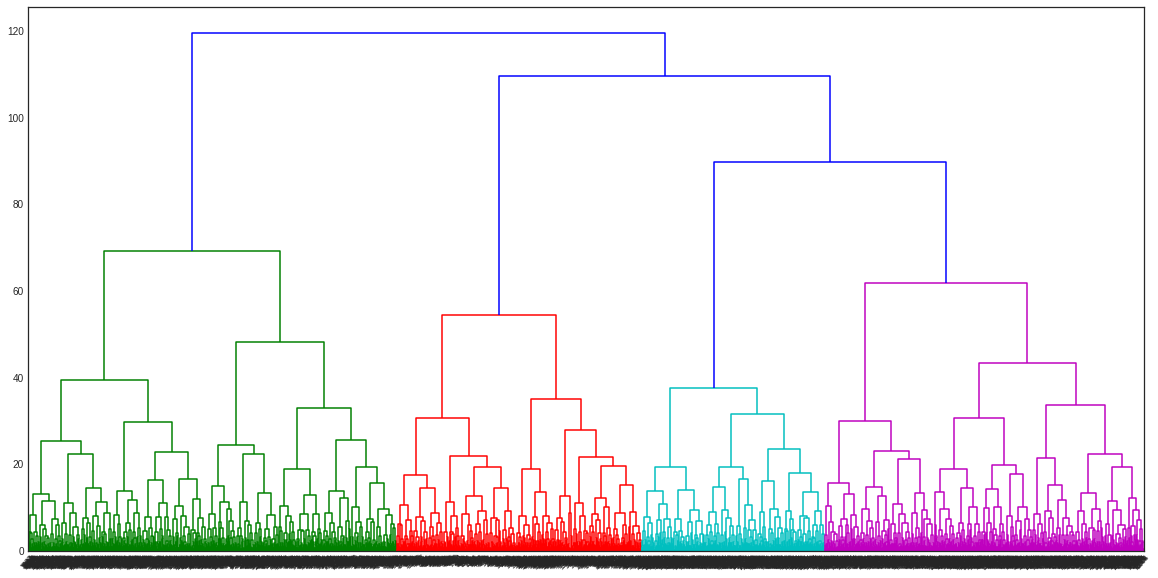

In [41]:
mergins = linkage(df, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(mergins,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [44]:
results =df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-24.610003,-14.374862,1
때,3.114695,-55.855976,1
보,2.502751,-61.841244,1
고,2.755032,-60.970253,1
지금,-0.155865,-59.520058,1
다시,1.528976,-60.912796,1
봐도,-0.413195,-60.333878,1
재밌,-11.995730,-61.083954,1
어요,-13.138123,-60.145535,1
ㅋㅋ,-15.426935,-59.347729,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


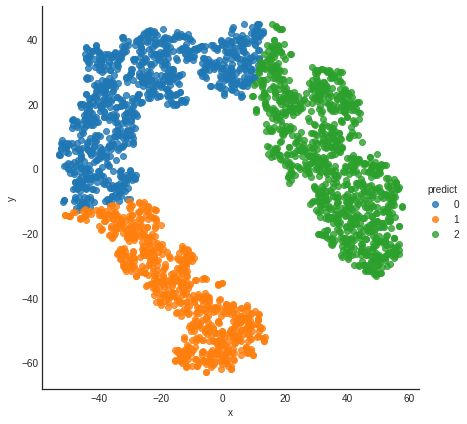

In [45]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

### 클러스터 개수 6

In [46]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([2, 1, 1, ..., 3, 3, 3], dtype=int32)

In [47]:
results =df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-24.610003,-14.374862,2
때,3.114695,-55.855976,1
보,2.502751,-61.841244,1
고,2.755032,-60.970253,1
지금,-0.155865,-59.520058,1
다시,1.528976,-60.912796,1
봐도,-0.413195,-60.333878,1
재밌,-11.995730,-61.083954,1
어요,-13.138123,-60.145535,1
ㅋㅋ,-15.426935,-59.347729,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


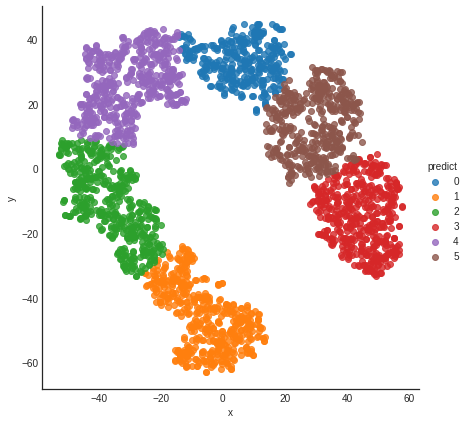

In [48]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()